<a href="https://colab.research.google.com/github/qwebasilio/CPE019/blob/main/Assignment_9_1_Convolutional_Neural_Network_Basilio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 9.1 | Convolutional Neural Network
--- | ---
**Name**  |  Basilio, Wilhelm Elian
**Course & Section**  |  CPE 019-CPE32S4
**Date** | April 23, 2024

In this activity, the dataset I chose and used is the cats_vs_dogs dataset. The dataset used in this activity comes from TensorFlow Datasets. It contains labeled images split evenly between cats and dogs. The goal is to build a CNN model that can accurately classify images into one of the two categories.


In [1]:
!pip install datasets

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)

train_data = dataset['train'].take(2000)
test_data = dataset['train'].skip(2000).take(1000)

def preprocess_image(image, label):
    image = tf.image.resize(image, [224, 224])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_data = train_data.map(preprocess_image)
test_data = test_data.map(preprocess_image)

train_data = train_data.cache().batch(32).prefetch(tf.data.experimental.AUTOTUNE)
test_data = test_data.cache().batch(32).prefetch(tf.data.experimental.AUTOTUNE)

In [3]:
def standardize_image(image, label):
    image = tf.image.per_image_standardization(image)
    return image, label

train_data = train_data.map(standardize_image)
test_data = test_data.map(standardize_image)

In [4]:
def zca_whitening(image, label):
    image = tf.image.per_image_standardization(image)
    return image, label

train_data = train_data.map(zca_whitening)
test_data = test_data.map(zca_whitening)

In [5]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 323ms/step - accuracy: 0.5424 - loss: 1.2806 - val_accuracy: 0.5050 - val_loss: 0.6963
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.5562 - loss: 0.6743 - val_accuracy: 0.6580 - val_loss: 0.6358
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.6805 - loss: 0.6031 - val_accuracy: 0.6740 - val_loss: 0.6123
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.7613 - loss: 0.4823 - val_accuracy: 0.6900 - val_loss: 0.6320
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.8540 - loss: 0.3438 - val_accuracy: 0.6870 - val_loss: 0.6775
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.9282 - loss: 0.2005 - val_accuracy: 0.6710 - val_loss: 0.8531
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9450 - loss: 0.1526 - val_accuracy: 0.6800 - val_loss: 0.9615
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.9356 - loss: 0.1704 - val_accuracy: 0.6860 -

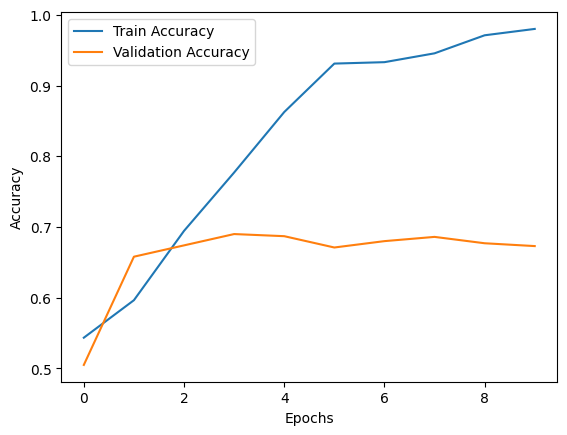

In [6]:
history = model.fit(train_data, epochs=10, validation_data=test_data)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [8]:
import tensorflow_datasets as tfds
import os

ds = tfds.load('cats_vs_dogs', split='train', as_supervised=True)

data_dir = '/content/cats_vs_dogs/train'
os.makedirs(data_dir, exist_ok=True)

class_labels = ['cat', 'dog']

for i, (image, label) in enumerate(ds):
    class_label = class_labels[label.numpy()]
    class_dir = os.path.join(data_dir, class_label)
    os.makedirs(class_dir, exist_ok=True)
    image_path = os.path.join(class_dir, f'{i}.jpg')
    with open(image_path, 'wb') as f:
        f.write(image.numpy())

augmented_data = augmented_datagen.flow_from_directory(
    '/content/cats_vs_dogs/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    save_to_dir=save_dir,
    save_prefix='aug',
    save_format='jpeg')

Found 23262 images belonging to 2 classes.


In [9]:
def evaluate_model(model, test_data):
    test_loss, test_acc = model.evaluate(test_data)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

evaluate_model(model, test_data)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6844 - loss: 1.2918
Test Loss: 1.3602629899978638, Test Accuracy: 0.6729999780654907


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 362ms/step - accuracy: 0.5794 - loss: 0.7286 - val_accuracy: 0.7270 - val_loss: 0.5549
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.7304 - loss: 0.5638 - val_accuracy: 0.7310 - val_loss: 0.5247
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.7538 - loss: 0.5121 - val_accuracy: 0.7550 - val_loss: 0.5017
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.7647 - loss: 0.5010 - val_accuracy: 0.7470 - val_loss: 0.5010
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - accuracy: 0.7759 - loss: 0.4697 - val_accuracy: 0.7550 - val_loss: 0.4973
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - accuracy: 0.7810 - loss: 0.4507 - val_accuracy: 0.7740 - val_loss: 0.4767
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - accuracy: 0.7923 - loss: 0.4400 - val_accuracy: 0.7570 - val_loss: 0.4964
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - accuracy: 0.7872 - loss: 0.4293 - val_accura

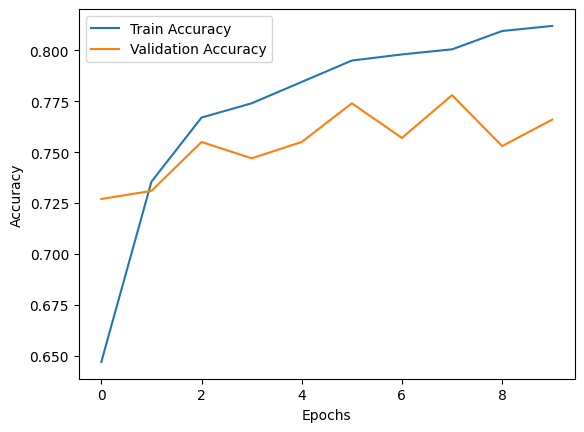

In [10]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

extended_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

extended_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_extended = extended_model.fit(train_data, epochs=10, validation_data=test_data)

plt.plot(history_extended.history['accuracy'], label='Train Accuracy')
plt.plot(history_extended.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


The model predicts: Dog


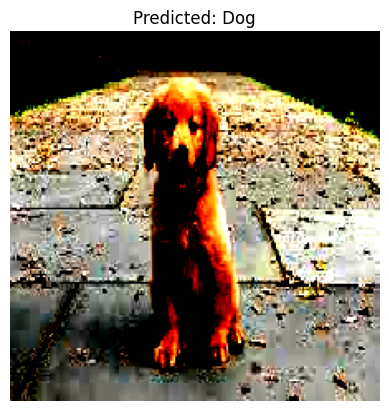

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

new_image_path = '/content/dog.jpg'
new_image = image.load_img(new_image_path, target_size=(224, 224))

new_image = image.img_to_array(new_image)
new_image = tf.image.per_image_standardization(new_image)
new_image = np.expand_dims(new_image, axis=0)

prediction = model.predict(new_image)

predicted_class = 'Dog' if prediction[0] > 0.5 else 'Cat'
print(f"The model predicts: {predicted_class}")

plt.imshow(new_image[0])
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()

##Conclusion

**Conclusion:**

In this activity, I managed to demonstrate the effectiveness of building a Convolutional Neural Network (CNN) to classify images of cats and dogs. My model achieved good accuracy using preprocessing, data augmentation, and transfer learning with a pre-trained ResNet50 model. While my initial model performed well, transfer learning significantly boosted performance and reduced overfitting. Further improvements could involve fine-tuning the pre-trained model or exploring more complex architectures. Overall, the model's ability to accurately classify new images highlights its potential for real-world applications in image recognition.